# Develop $\xi_{gg}$:

1. Loading emulators
2. Predict $\xi_{hh}(r)$ on $(M_{th1}, M_{th2})$ grids for a new cosmology:

In [3]:
from gal_goku import emu_cosmo
import importlib
importlib.reload(emu_cosmo)
import numpy as np
import time

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
emu = emu_cosmo.XiEmulator(dat_dir=data_dir, loggin_level='ERROR')
mass_pair = (11.4, 11.4)

start = time.time()
cosmo = (emu.cosmo_min + emu.cosmo_max)/2.0
xi_pred, var_pred = emu.predict_xi(mass_pair[0], mass_pair[1], cosmo[:,np.newaxis])
end = time.time()
print(f'Elapsed time for prediction: seconds = {(end-start):.1f}')

2025-04-03 22:31:36.680669: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 22:31:36.683563: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 22:31:36.693581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743737496.709968 4153841 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743737496.714825 4153841 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-03 22:31:36.731900: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Elapsed time for prediction: seconds = 4.7


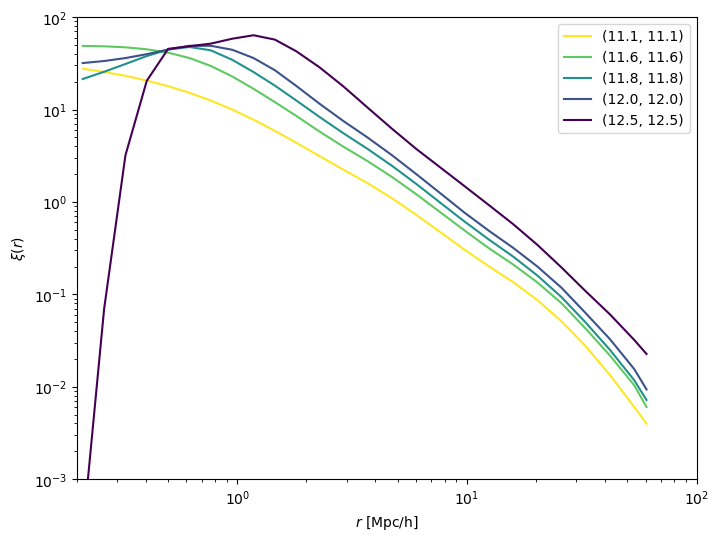

In [10]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 1, figsize=(8, 6))
mpair = [(11.1, 11.1), (11.6, 11.6), (11.8, 11.8),  (12.0, 12.0), (12.5, 12.5)]

viridis = plt.get_cmap('viridis', len(mpair)).reversed()
for i in range(len(mpair)):
    cosmo = (emu.cosmo_min + emu.cosmo_max)/2.0
    xi_pred, var_pred = emu.predict_xi(mpair[i][0], mpair[i][1], cosmo[:,np.newaxis])
    ind = np.where((emu.mass_pairs[:, 0] == mpair[i][0]) * (emu.mass_pairs[:, 1] == mpair[i][1]))[0]
    ax.plot(emu.rbins, 10**xi_pred.squeeze(), label=f'{mpair[i]}', color=viridis(i / len(mpair)))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(2e-1, 1e2)
ax.set_ylim(1e-3, 1e2)
ax.set_xlabel(r'$r$ [Mpc/h]')
ax.set_ylabel(r'$\xi(r)$')
ax.legend()

/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")
/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")
/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")
/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")
/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")
/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced"

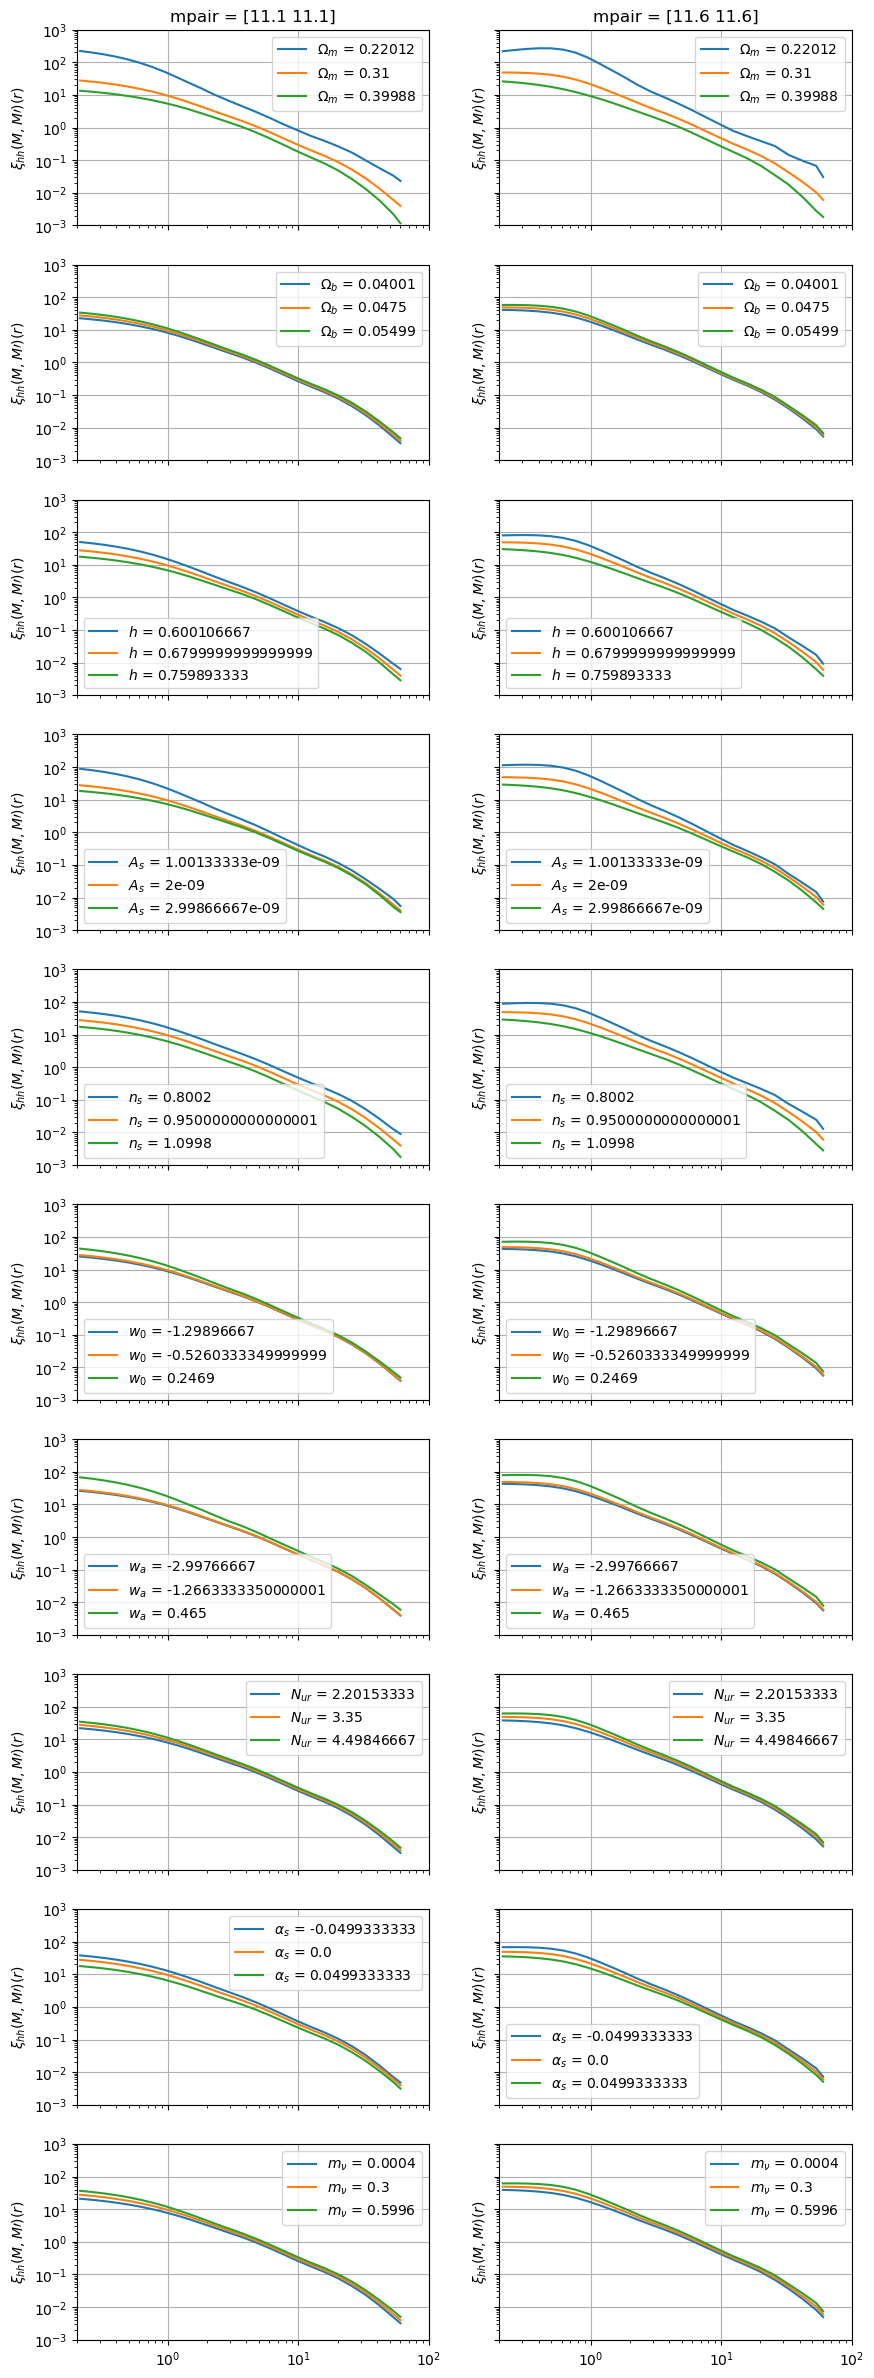

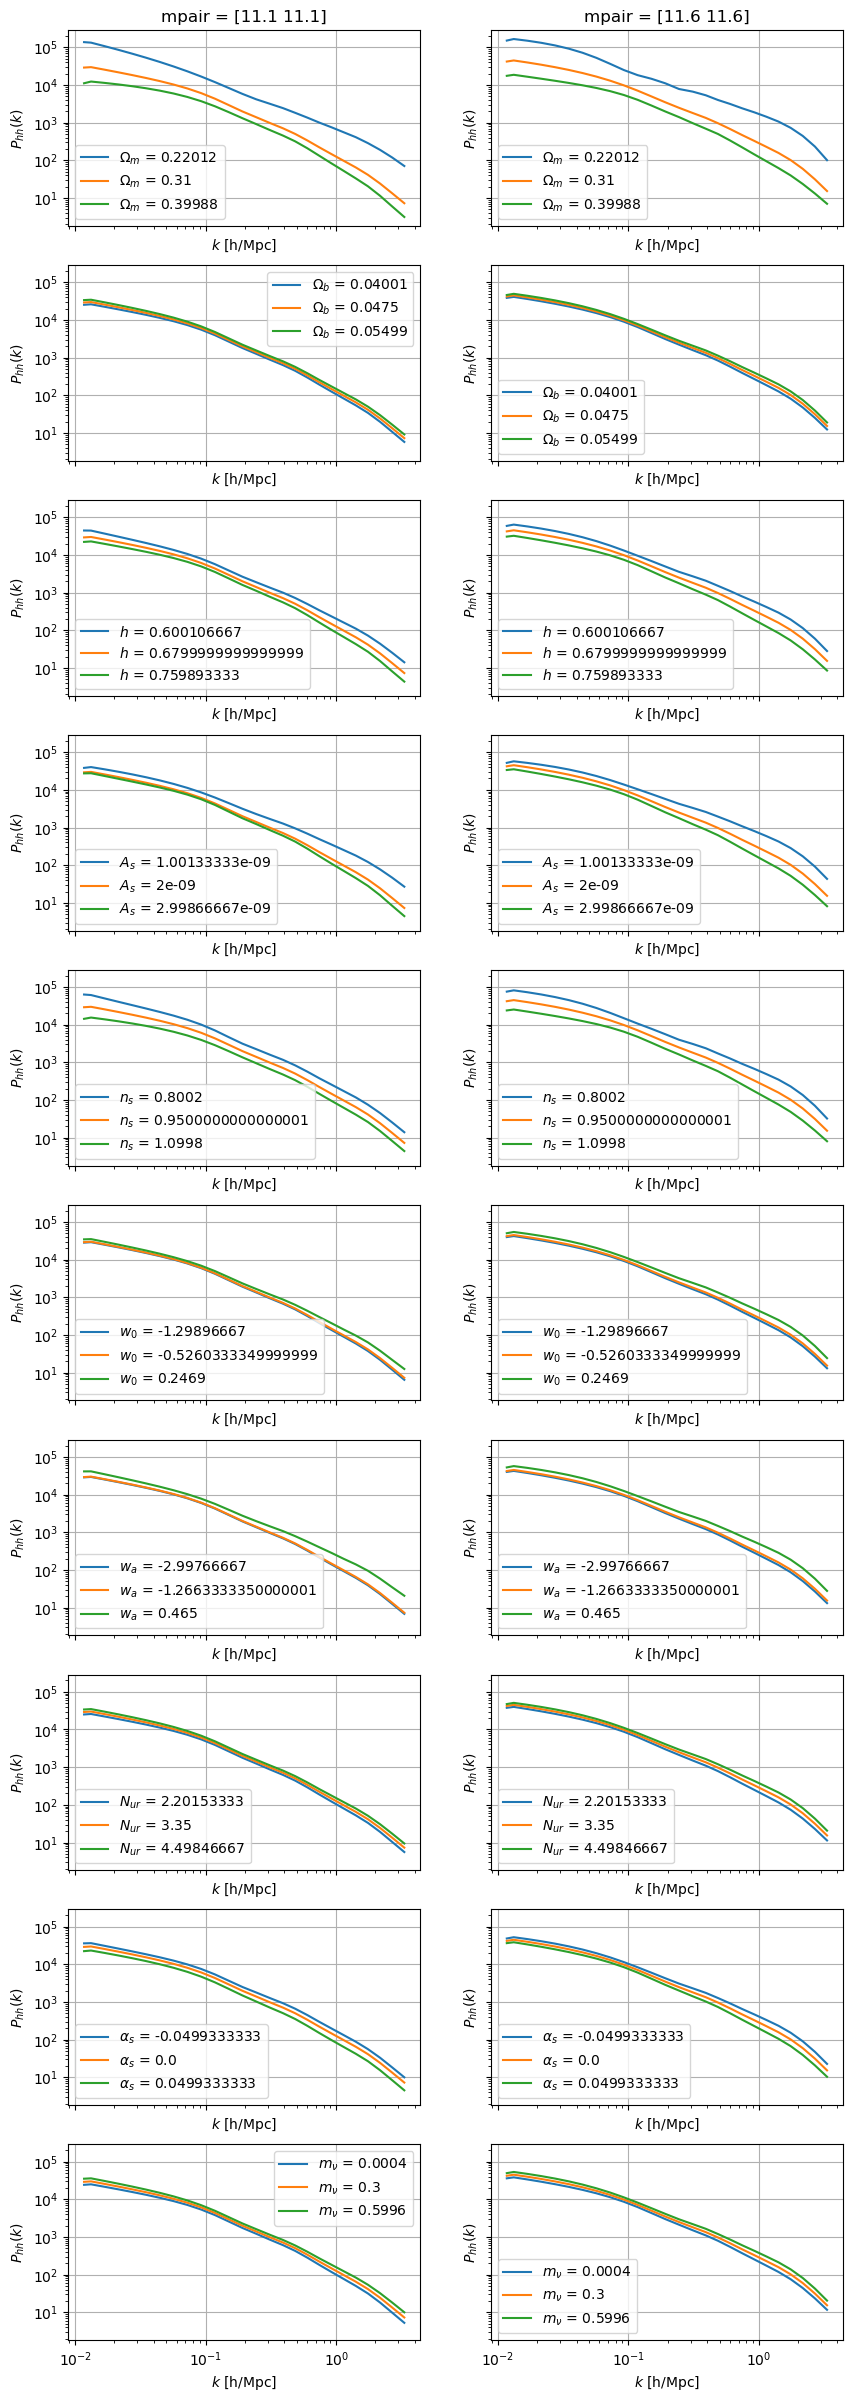

In [4]:
from gal_goku import emu_cosmo
import importlib
importlib.reload(emu_cosmo)
import numpy as np
import matplotlib.pyplot as plt
import mcfit

params=['omega0', 'omegab', 'hubble', 'scalar_amp', 'ns', 
        'w0_fld', 'wa_fld', 'N_ur', 'alpha_s', 
        'm_nu']
latex_labels = {'omega0': r'$\Omega_m$', 'omegab': r'$\Omega_b$', 
                             'hubble': r'$h$', 'scalar_amp': r'$A_s$', 'ns': r'$n_s$', 
                             'w0_fld': r'$w_0$', 'wa_fld': r'$w_a$', 'N_ur': r'$N_{ur}$', 
                             'alpha_s': r'$\alpha_s$', 'm_nu': r'$m_{\nu}$'}

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
emu = emu_cosmo.XiEmulator(dat_dir=data_dir, loggin_level='ERROR')

cosmo_mid = (emu.cosmo_min + emu.cosmo_max)/2.0
all_mass_pairs = np.array([(11.1, 11.1), (11.6, 11.6)])


fig, axes = plt.subplots(len(cosmo_mid), 2, figsize=(10, 3 * len(cosmo_mid)), sharex=True, sharey=True)
fig_pk, axes_pk = plt.subplots(len(cosmo_mid), 2, figsize=(10, 3 * len(cosmo_mid)), sharex=True, sharey=True)

for m in range(len(all_mass_pairs)):
        for i in range(len(cosmo_mid)):
                cosmo_low = cosmo_mid.copy()
                cosmo_low[i] = emu.cosmo_min[i]
                cosmo_high = cosmo_mid.copy()
                cosmo_high[i] = emu.cosmo_max[i]
                all_cosmos = np.array([cosmo_low, cosmo_mid, cosmo_high])
                for c in range(len(all_cosmos)):
                        xi_pred, _ = emu.predict_xi(all_mass_pairs[m][0], all_mass_pairs[m][1], all_cosmos[c][:, np.newaxis])
                        k, phh = mcfit.xi2P(emu.rbins, l=0, lowring=True)(xi_pred, extrap=True)
                        axes[i, m].plot(emu.rbins, xi_pred.squeeze(), label=rf'{latex_labels[params[i]]} = {all_cosmos[c][i]}', color=f'C{c}')
                        axes_pk[i, m].plot(k, phh.squeeze(), label=rf'{latex_labels[params[i]]} = {all_cosmos[c][i]}', color=f'C{c}')
                axes[i, m].set_xscale('log')
                axes[i, m].set_yscale('log')
                axes[i, m].set_xlim(2e-1, 1e2)
                axes[i, m].set_ylim(1e-3, 1e3)
                axes[i, m].set_ylabel(r'$\xi_{hh}(M, M\prime)(r)$')
                axes[i,m].grid(True)
                axes[i,m].legend()
                axes_pk[i,m].set_ylabel(r'$P_{hh}(k)$')
                axes_pk[i,m].set_xlabel(r'$k$ [h/Mpc]')
                axes_pk[i, m].set_xscale('log')
                axes_pk[i, m].set_yscale('log')
                axes_pk[i, m].grid(True)
                axes_pk[i, m].legend()
        axes[0, m].set_title(f'mpair = {all_mass_pairs[m]}')
        axes_pk[0, m].set_title(f'mpair = {all_mass_pairs[m]}')

2025-04-06 20:38:58.713607: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-06 20:38:58.716804: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-06 20:38:58.726682: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743989938.742782  123167 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743989938.747575  123167 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-06 20:38:58.764979: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Text(0.5, 1.0, 'mpair = [11.6 11.6]')

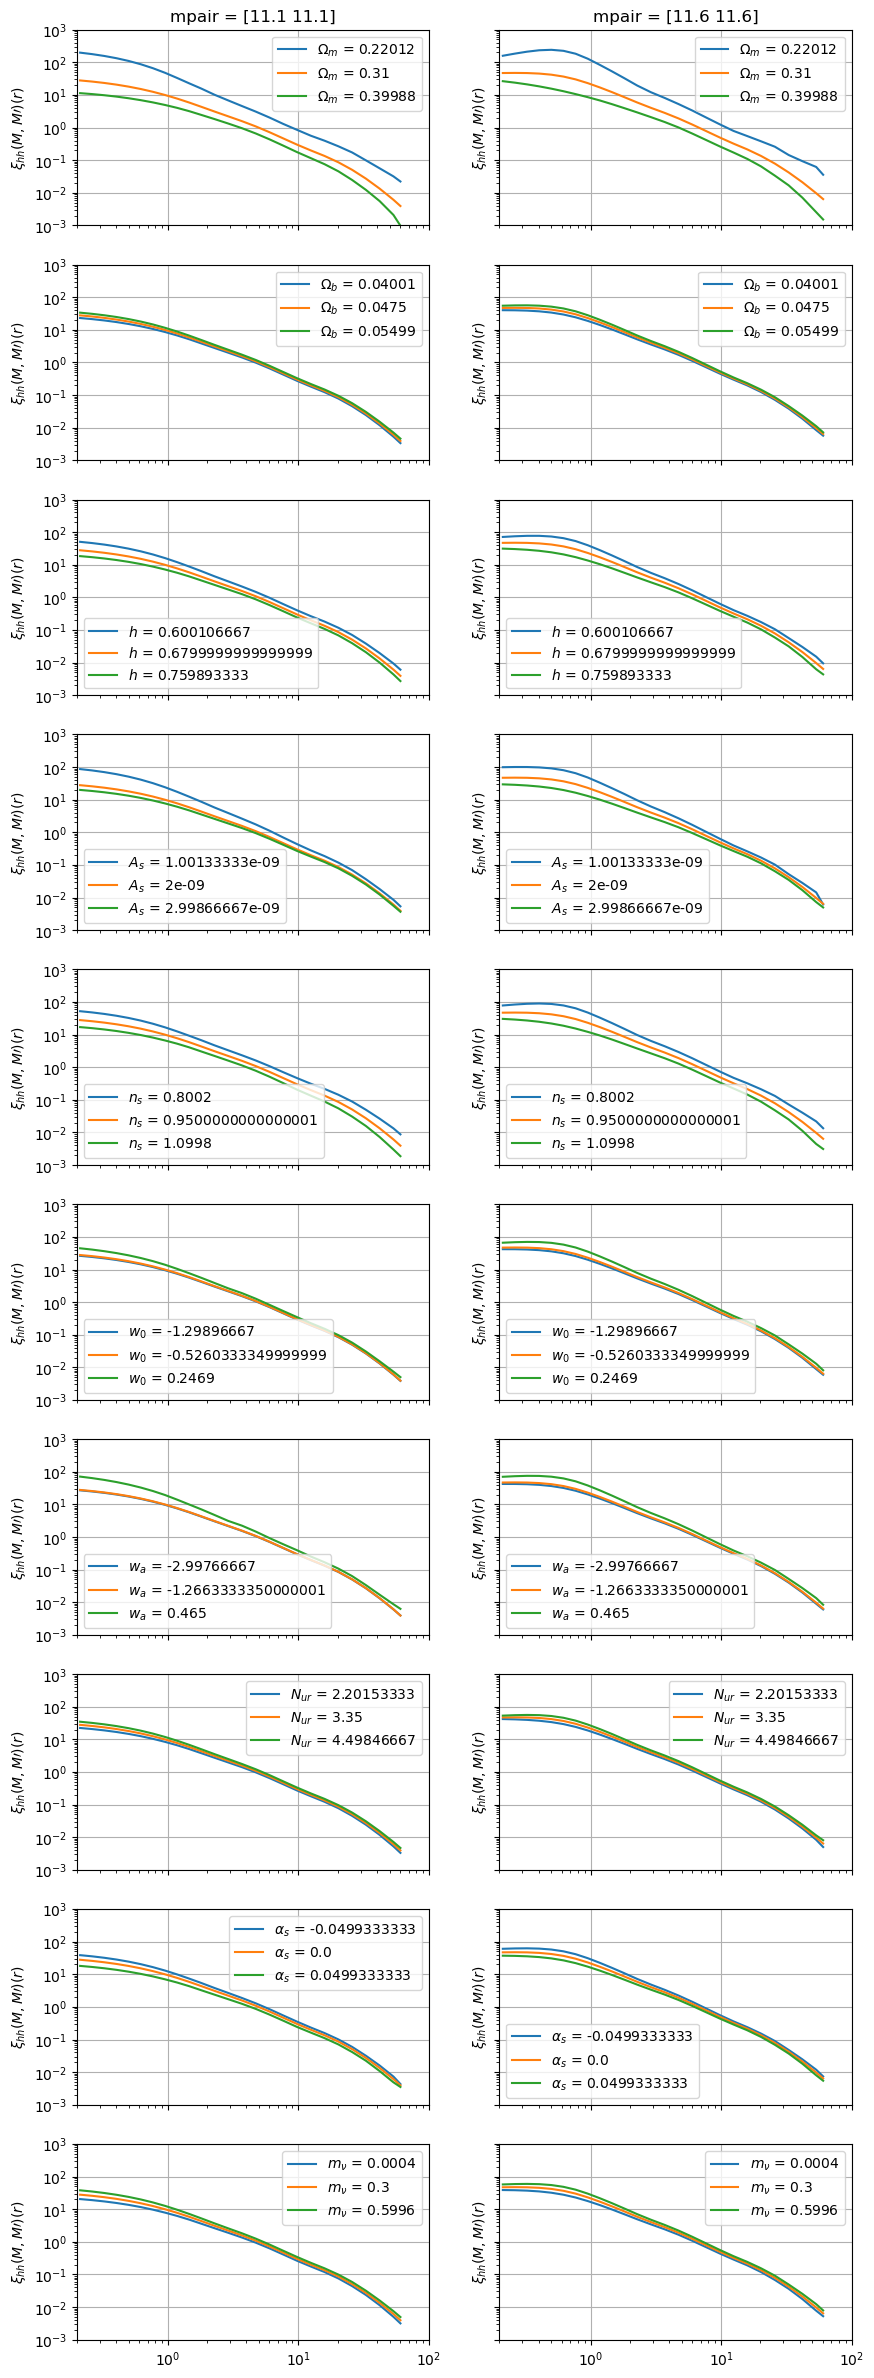

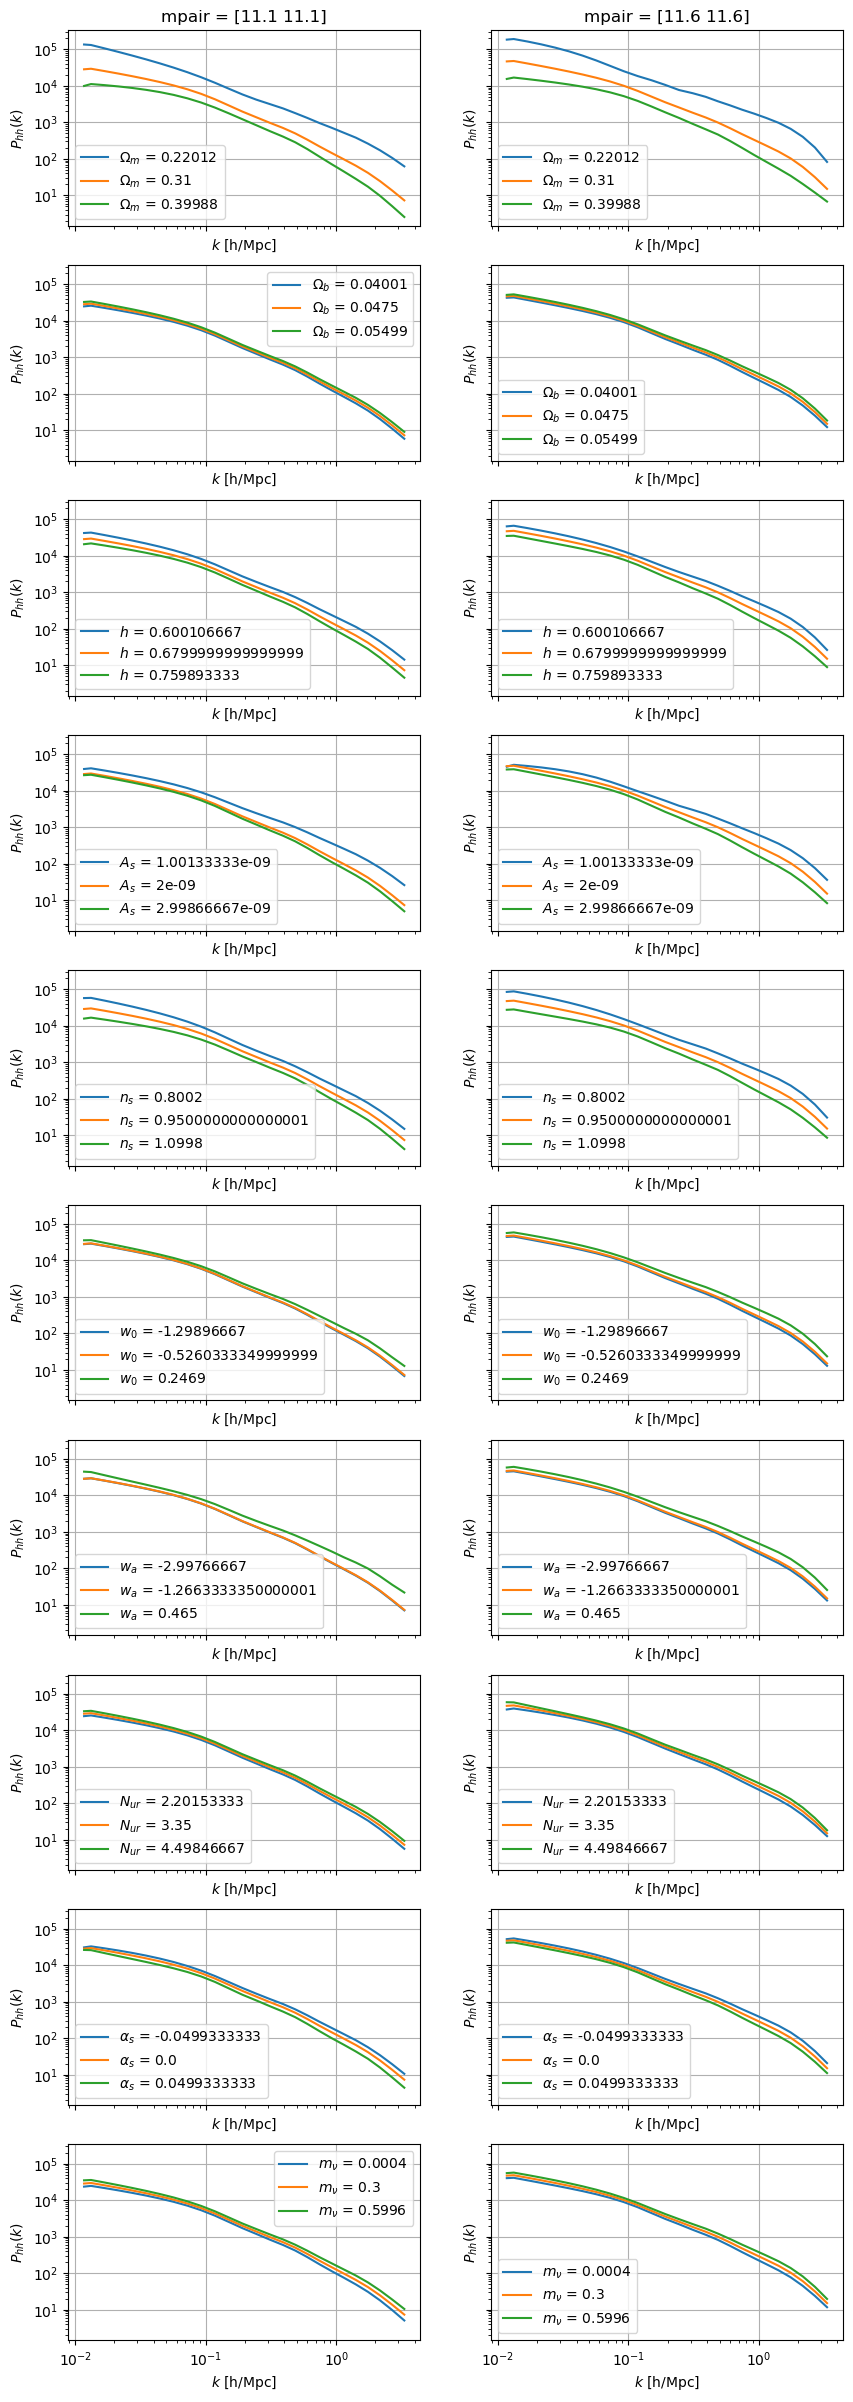

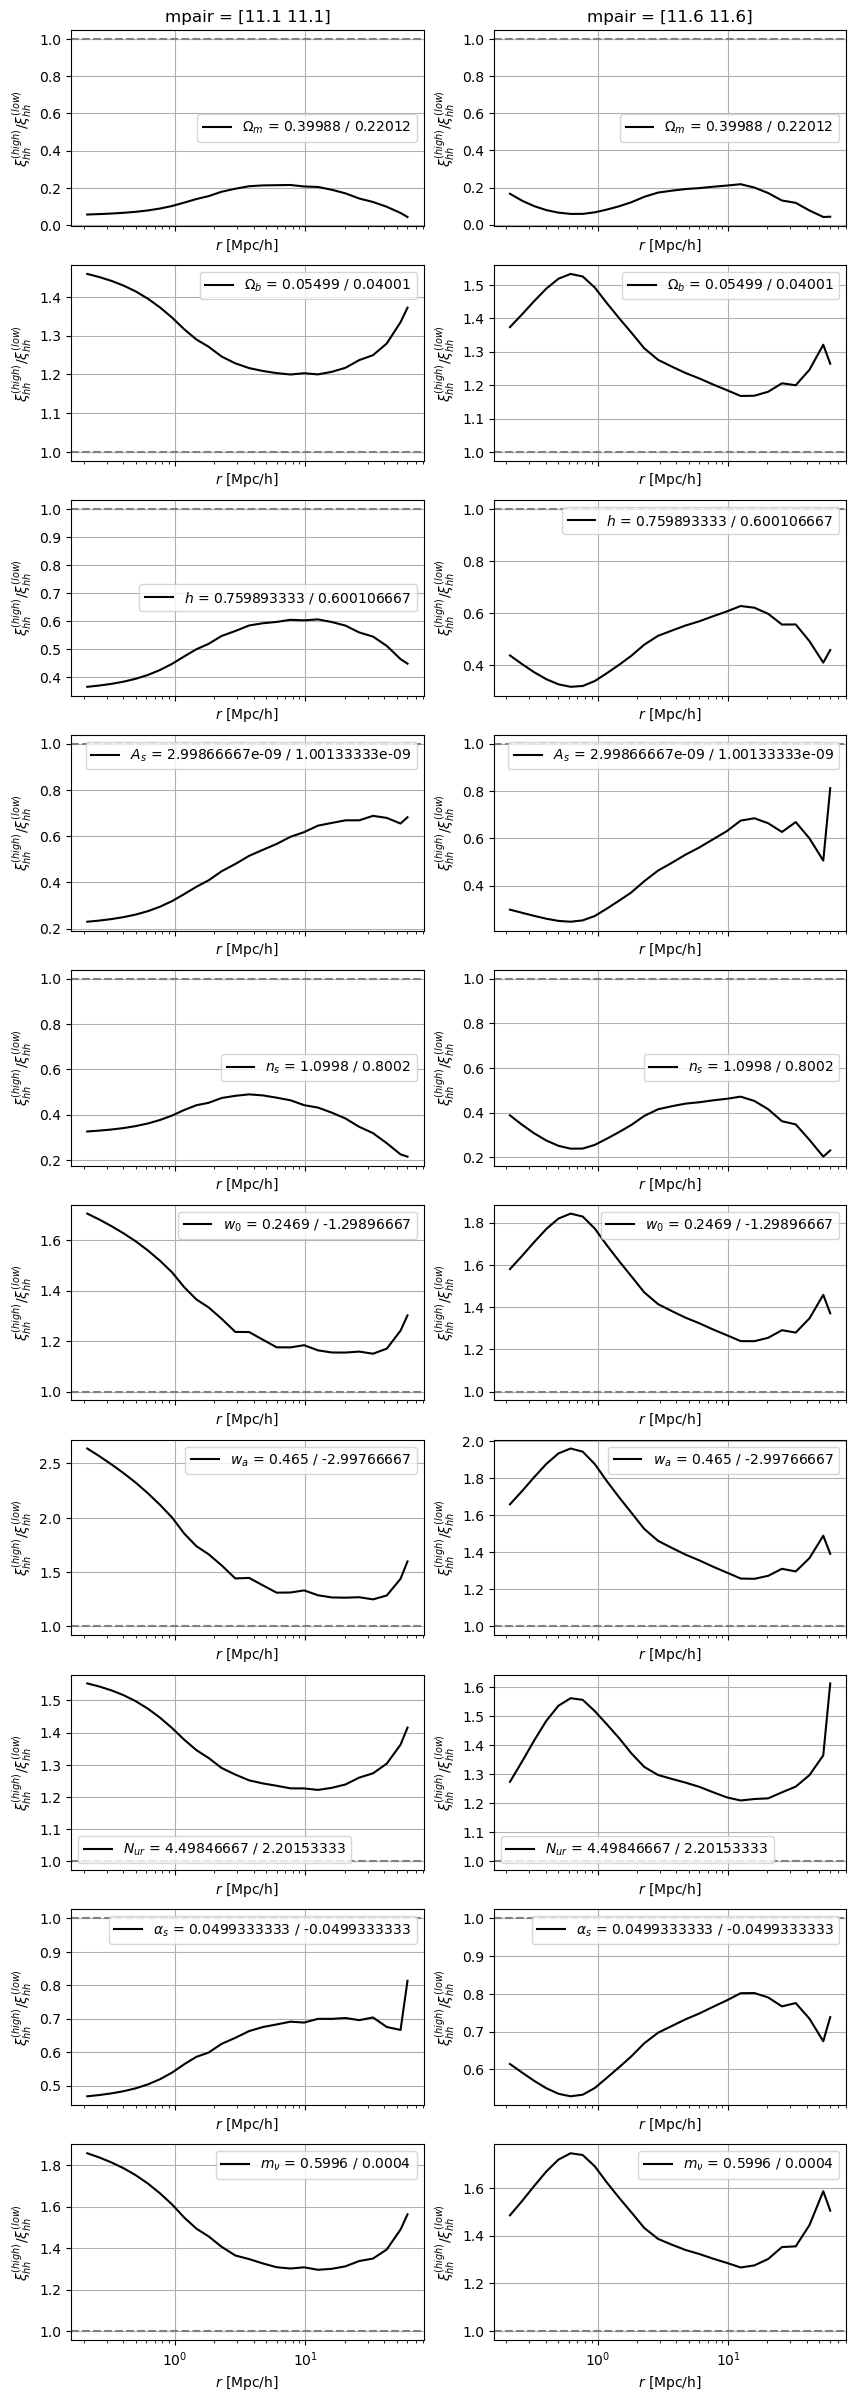

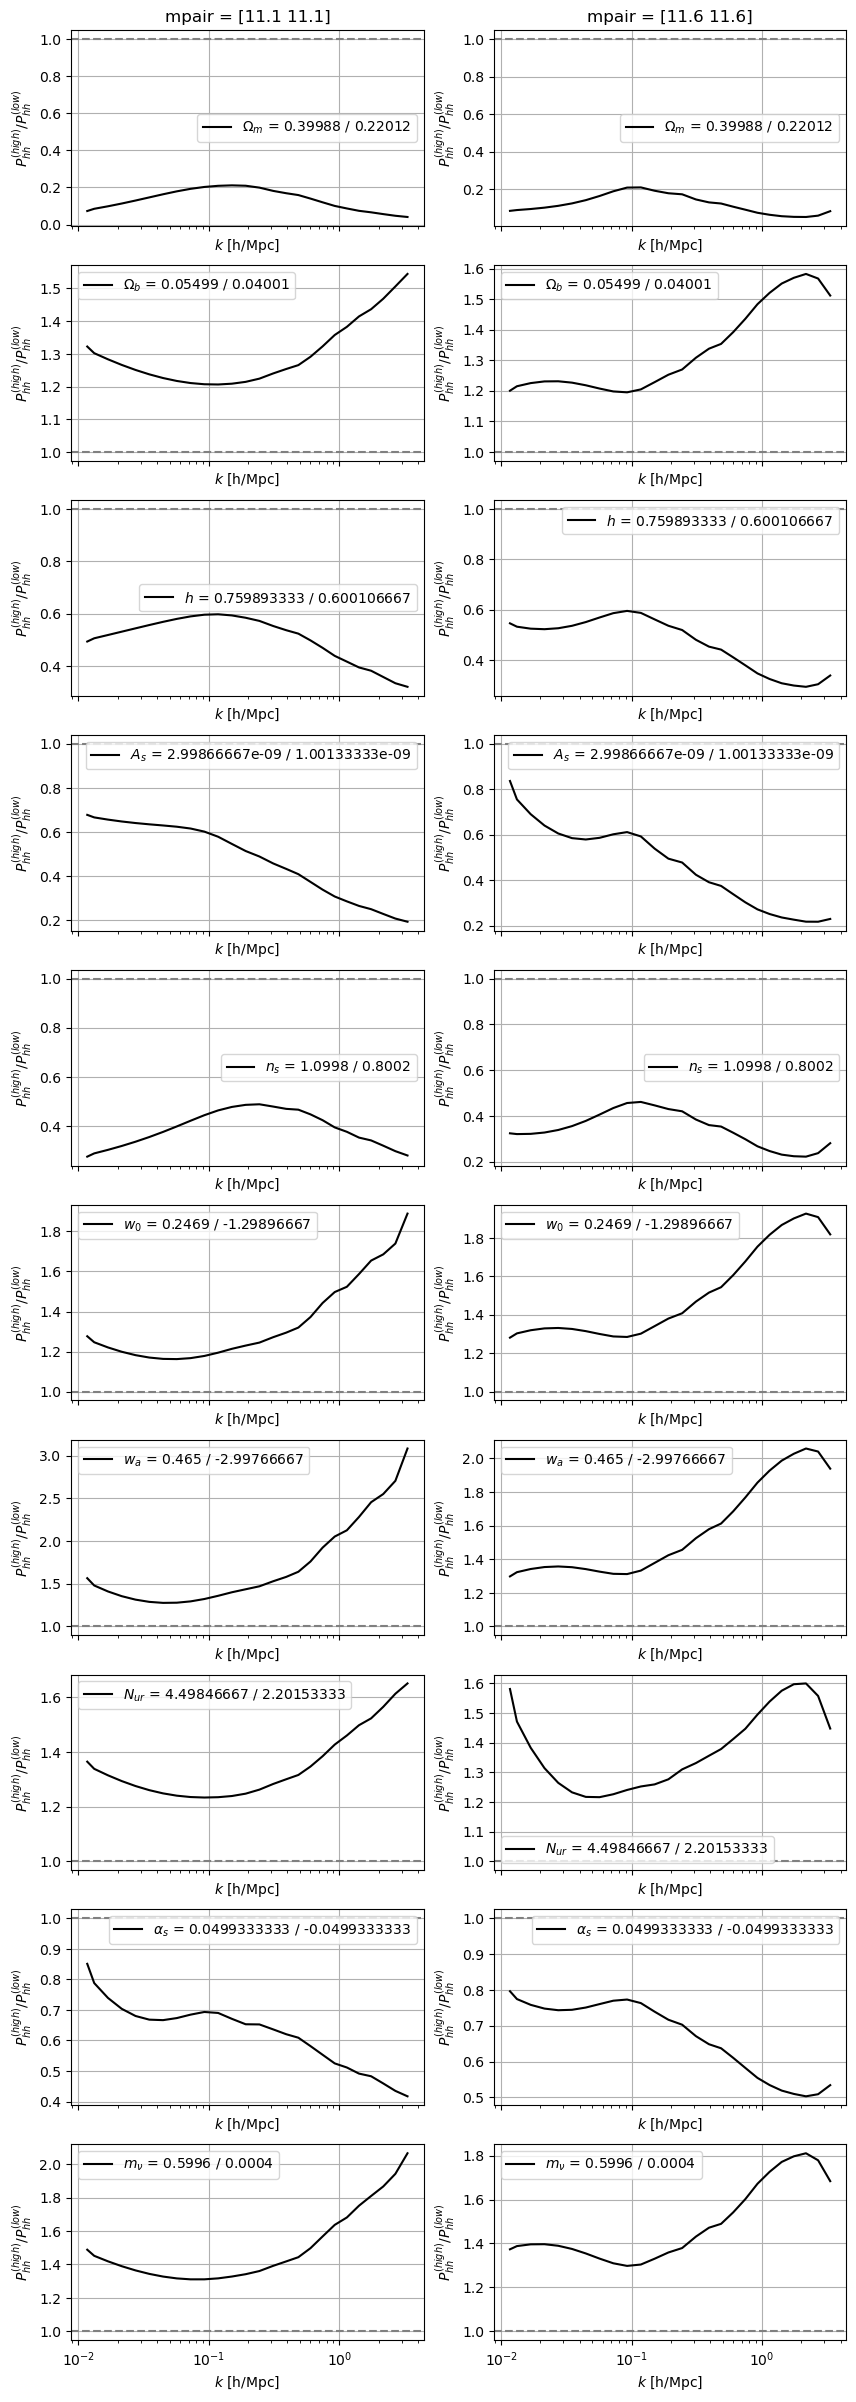

In [1]:
from gal_goku import emu_cosmo
import importlib
importlib.reload(emu_cosmo)
import numpy as np
import matplotlib.pyplot as plt
import mcfit

params=['omega0', 'omegab', 'hubble', 'scalar_amp', 'ns', 
        'w0_fld', 'wa_fld', 'N_ur', 'alpha_s', 
        'm_nu']
latex_labels = {'omega0': r'$\Omega_m$', 'omegab': r'$\Omega_b$', 
                             'hubble': r'$h$', 'scalar_amp': r'$A_s$', 'ns': r'$n_s$', 
                             'w0_fld': r'$w_0$', 'wa_fld': r'$w_a$', 'N_ur': r'$N_{ur}$', 
                             'alpha_s': r'$\alpha_s$', 'm_nu': r'$m_{\nu}$'}

order_ratio = [(1,2), (2,1), (1,2), (2,1)]
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
emu = emu_cosmo.XiEmulator(dat_dir=data_dir, loggin_level='ERROR')

cosmo_mid = (emu.cosmo_min + emu.cosmo_max)/2.0
all_mass_pairs = np.array([(11.1, 11.1), (11.6, 11.6)])


fig, axes = plt.subplots(len(cosmo_mid), 2, figsize=(10, 3 * len(cosmo_mid)), sharex=True, sharey=True)
fig_pk, axes_pk = plt.subplots(len(cosmo_mid), 2, figsize=(10, 3 * len(cosmo_mid)), sharex=True, sharey=True)
fig_ratio, axes_ratio = plt.subplots(len(cosmo_mid), 2, figsize=(10, 3 * len(cosmo_mid)), sharex=True, sharey=False)
fig_pk_ratio, axes_pk_ratio = plt.subplots(len(cosmo_mid), 2, figsize=(10, 3 * len(cosmo_mid)), sharex=True, sharey=False)

for m in range(len(all_mass_pairs)):
    for i in range(len(cosmo_mid)):
        cosmo_low = cosmo_mid.copy()
        cosmo_low[i] = emu.cosmo_min[i]
        cosmo_high = cosmo_mid.copy()
        cosmo_high[i] = emu.cosmo_max[i]
        all_cosmos = np.array([cosmo_low, cosmo_mid, cosmo_high])
        
        xi_preds = []
        phhs = []
        for c in range(len(all_cosmos)):
            xi_pred, var_pred = emu.predict_xi(all_mass_pairs[m][0], all_mass_pairs[m][1], all_cosmos[c][:, np.newaxis])
            k, phh = mcfit.xi2P(emu.rbins, l=0, lowring=True)(xi_pred, extrap=True)
            xi_preds.append(xi_pred.squeeze())
            phhs.append(phh.squeeze())
            #axes[i, m].errorbar(emu.rbins, xi_pred.squeeze(), yerr=np.sqrt(var_pred.squeeze()), 
            #                    label=rf'{latex_labels[params[i]]} = {all_cosmos[c][i]}', color=f'C{c}', capsize=3, alpha=0.7)
            axes[i, m].plot(emu.rbins, xi_pred.squeeze(), label=rf'{latex_labels[params[i]]} = {all_cosmos[c][i]}', color=f'C{c}')
            axes_pk[i, m].plot(k, phh.squeeze(), label=rf'{latex_labels[params[i]]} = {all_cosmos[c][i]}', color=f'C{c}')
            axes[i, m].set_xscale('log')
            axes[i, m].set_yscale('log')
            axes[i, m].set_xlim(2e-1, 1e2)
            axes[i, m].set_ylim(1e-3, 1e3)
            axes[i, m].set_ylabel(r'$\xi_{hh}(M, M\prime)(r)$')
            axes[i,m].grid(True)
            axes[i,m].legend()
            axes_pk[i,m].set_ylabel(r'$P_{hh}(k)$')
            axes_pk[i,m].set_xlabel(r'$k$ [h/Mpc]')
            axes_pk[i, m].set_xscale('log')
            axes_pk[i, m].set_yscale('log')
            axes_pk[i, m].grid(True)
            axes_pk[i, m].legend()
        axes[0, m].set_title(f'mpair = {all_mass_pairs[m]}')
        axes_pk[0, m].set_title(f'mpair = {all_mass_pairs[m]}')
        
        # Plot ratio for xi_pred
        ratio_xi = xi_preds[2] / xi_preds[0]
        label_ratio = rf'{latex_labels[params[i]]} = {all_cosmos[2][i]} / {all_cosmos[0][i]}'
        axes_ratio[i, m].plot(emu.rbins, ratio_xi, label=label_ratio, color='black')
        axes_ratio[i, m].axhline(1, color='gray', linestyle='--')
        axes_ratio[i, m].set_xscale('log')
        axes_ratio[i, m].set_xlabel(r'$r$ [Mpc/h]')
        axes_ratio[i, m].set_ylabel(r'$\xi_{hh}^{(high)}/\xi_{hh}^{(low)}$')
        axes_ratio[i, m].grid(True)
        axes_ratio[i, m].legend()
        
        # Plot ratio for phh
        ratio_phh = phhs[2] / phhs[0]
        axes_pk_ratio[i, m].plot(k, ratio_phh, label=label_ratio, color='black')
        axes_pk_ratio[i, m].axhline(1, color='gray', linestyle='--')
        axes_pk_ratio[i, m].set_xscale('log')
        axes_pk_ratio[i, m].set_xlabel(r'$k$ [h/Mpc]')
        axes_pk_ratio[i, m].set_ylabel(r'$P_{hh}^{(high)}/P_{hh}^{(low)}$')
        axes_pk_ratio[i, m].grid(True)
        axes_pk_ratio[i, m].legend()

axes_ratio[0, 0].set_title(f'mpair = {all_mass_pairs[0]}')
axes_pk_ratio[0, 0].set_title(f'mpair = {all_mass_pairs[0]}')
axes_ratio[0, 1].set_title(f'mpair = {all_mass_pairs[1]}')
axes_pk_ratio[0, 1].set_title(f'mpair = {all_mass_pairs[1]}')


## Check cosmo sensitivity on the sims:

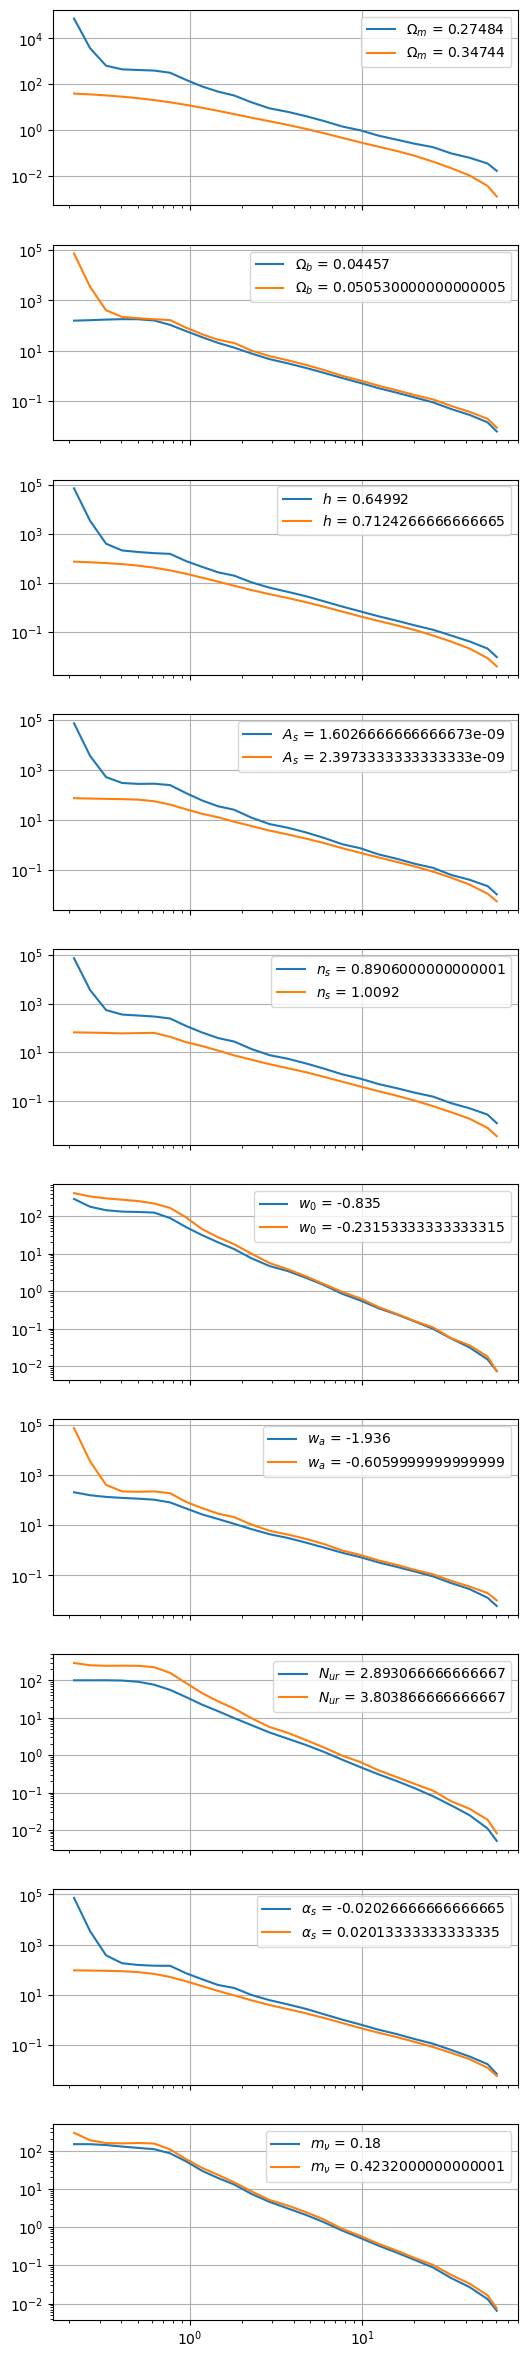

In [29]:
from matplotlib import pyplot as plt
from gal_goku import summary_stats
import numpy as np

params=['omega0', 'omegab', 'hubble', 'scalar_amp', 'ns', 
        'w0_fld', 'wa_fld', 'N_ur', 'alpha_s', 
        'm_nu']
latex_labels = {'omega0': r'$\Omega_m$', 'omegab': r'$\Omega_b$', 
                             'hubble': r'$h$', 'scalar_amp': r'$A_s$', 'ns': r'$n_s$', 
                             'w0_fld': r'$w_0$', 'wa_fld': r'$w_a$', 'N_ur': r'$N_{ur}$', 
                             'alpha_s': r'$\alpha_s$', 'm_nu': r'$m_{\nu}$'}

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
mass_pair = (11.4, 11.4)
xi = summary_stats.Xi(data_dir=data_dir, fid='L2',  logging_level='ERROR')
rbins, _, corr, bad_sims_mask = xi.spline_nan_interp(mass_pair, rcut=(0.2,61))
cosmos = xi.get_params_array()[~bad_sims_mask]
corr = corr[~bad_sims_mask]
percent = np.percentile(cosmos, [30, 50, 70], axis=0)
fig, ax = plt.subplots(10, 1, figsize=(6, 30), sharex=True)
for i in range(10):
    ind = np.where(cosmos[:,i] <= percent[0,i])[0]
    xi_low = np.mean(10**corr[ind,:], axis=0)
    ind = np.where(cosmos[:,i] >= percent[2,i])[0]
    xi_high = np.mean(10**corr[ind,:], axis=0)

    
    ax[i].plot(rbins, xi_low, label=rf'{latex_labels[params[i]]} = {percent[0,i]}')
    ax[i].plot(rbins, xi_high, label=rf'{latex_labels[params[i]]} = {percent[2,i]}')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].legend()
    ax[i].grid(True)


## linear power:

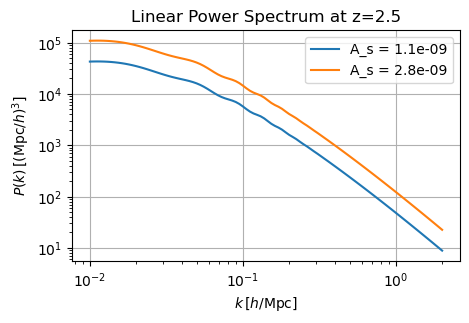

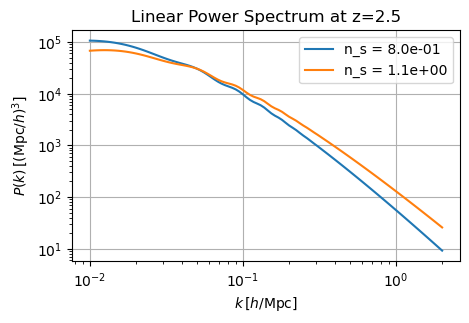

In [16]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

# Define cosmological parameters
params = {
    'output': 'mPk',
    'P_k_max_h/Mpc': 10,
    'z_pk': '2.5',
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'h': 0.67,
    'omega_b': 0.022,
    'omega_cdm': 0.12,
}

Aps = [1.1e-9, 2.8e-9]
fig ,ax = plt.subplots(1, 1, figsize=(5, 3))
for i in range(2):
    params_new = params.copy()
    params_new['A_s'] = Aps[i]
    # Initialize CLASS
    cosmo = Class()
    cosmo.set(params_new)
    cosmo.compute()


    # Get P(k) at z=0
    k_vals = np.logspace(-2, np.log10(2), 100)  # in h/Mpc
    pk_vals = [cosmo.pk(k, 0) for k in k_vals]  # z=0

    # Plot
    ax.loglog(k_vals, pk_vals, label=f'A_s = {Aps[i]:.1e}')
    ax.set_xlabel(r'$k \, [h/\mathrm{Mpc}]$')
    ax.set_ylabel(r'$P(k) \, [(\mathrm{Mpc}/h)^3]$')
    ax.set_title('Linear Power Spectrum at z=2.5')
    ax.grid(True)
    ax.legend()

    # Clean up
    cosmo.struct_cleanup()
    cosmo.empty()

# Define cosmological parameters
params = {
    'output': 'mPk',
    'P_k_max_h/Mpc': 10,
    'z_pk': '2.5',
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'h': 0.67,
    'omega_b': 0.022,
    'omega_cdm': 0.12,
}

ns = [0.8, 1.08]
fig ,ax = plt.subplots(1, 1, figsize=(5, 3))
for i in range(2):
    params_new = params.copy()
    params_new['n_s'] = ns[i]
    # Initialize CLASS
    cosmo = Class()
    cosmo.set(params_new)
    cosmo.compute()


    # Get P(k) at z=0
    k_vals = np.logspace(-2, np.log10(2), 100)  # in h/Mpc
    pk_vals = [cosmo.pk(k, 0) for k in k_vals]  # z=0

    # Plot
    ax.loglog(k_vals, pk_vals, label=f'n_s = {ns[i]:.1e}')
    ax.set_xlabel(r'$k \, [h/\mathrm{Mpc}]$')
    ax.set_ylabel(r'$P(k) \, [(\mathrm{Mpc}/h)^3]$')
    ax.set_title('Linear Power Spectrum at z=2.5')
    ax.grid(True)
    ax.legend()

    # Clean up
    cosmo.struct_cleanup()
    cosmo.empty()

